<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

# Data Cleaning and EDA

Are missing values imputed/handled appropriately?

- In the context of subreddit, missing values could be due to user not making the right input or deleted / removed text. It is hard to guess what text would have been keyed in. Dropping them as we have many other data points.

Are distributions examined and described?

- Getting the character count of the text / processed text provides numbers to make sense of. Word clouds, and a barchart of top ngrams help provide a quick overview the words that will influence the classification. 

Are outliers identified and addressed?

- Getting the character count of the text / processed text shows there are outliers with exceptional character counts. As we are classifying the data, we can keep the outliers. 

Are appropriate summary statistics provided?

- using .info on the cleaned combined df offers an overview of the data we have. 

Are steps taken during data cleaning and EDA framed appropriately?

- They are generally outlined.

Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

- Seems that it will be easier to use the words identified for digital marketing, but there needs to be more deep diving into the individial ngrams to make sense of what users struggle with or have ease of use for the recommendation to the software devs. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import time
import spacy
import string

from sklearn.feature_extraction import text

#nlp = spacy.load("en_core_web_lg")
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Let's call all the functions
pd.set_option('display.max_colwidth', 100)
nltk.download('wordnet')

# NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package wordnet to /Users/Shu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# loading scraped dataset
zoom = pd.read_csv('zoom_scraped.csv', low_memory=False)

In [4]:
zoom.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,edited,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,url,author_cakeday,author_flair_background_color,author_flair_text_color,removed_by_category,post_hint,preview,thumbnail_height,thumbnail_width,discussion_type,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,banned_by,media_metadata,treatment_tags,poll_data,author_flair_template_id,upvote_ratio,url_overridden_by_dest,parent_whitelist_status,pwls,whitelist_status,wls,gallery_data,is_gallery
0,[],False,LionSuneater,NaN,[],NaN,text,t2_4don0ngl,False,False,[],False,False,1585700105,self.Zoom,1.585703e+09,https://www.reddit.com/r/Zoom/comments/fsopa0/can_i_keep_a_back_screen_with_my_video_off_if_i/,{},fsopa0,True,False,False,False,True,True,False,#00a6a5,[],3cc8414a-6fc3-11ea-bd71-0e1557d8426f,Question,light,text,False,False,True,0,0,False,/r/Zoom/comments/fsopa0/can_i_keep_a_back_screen_with_my_video_off_if_i/,False,1585702837,2,"I'd like to keep the standard black screen with my name on it when my video is off, but I'd also...",True,False,False,Zoom,t5_3095n,713,public,confidence,self,Can I keep a back screen with my video off if I also have a profile photo?,0,https://www.reddit.com/r/Zoom/comments/fsopa0/can_i_keep_a_back_screen_with_my_video_off_if_i/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,lucky8771,NaN,[],NaN,text,t2_14mbxhvl,False,False,[],False,False,1585700851,self.Zoom,NaN,https://www.reddit.com/r/Zoom/comments/fsowjy/drop_a_code_of_a_class_or_something_going_on/,{},fsowjy,True,False,False,False,True,True,False,#373c3f,[],5bc9e972-6fc3-11ea-aba4-0eacc84975dd,Other,light,text,False,False,True,2,0,False,/r/Zoom/comments/fsowjy/drop_a_code_of_a_class_or_something_going_on/,False,1585703476,1,NaN,True,False,False,Zoom,t5_3095n,713,public,confidence,self,Drop a code of a class or something going on right now,0,https://www.reddit.com/r/Zoom/comments/fsowjy/drop_a_code_of_a_class_or_something_going_on/,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# For this project, I'm just interested in what is being said. Will drop all columns except Subreddit, selftext & title. 
# Combining selftext & title as some posts have only title or selftext or even title duplicated into selftext.
zoom['text'] = zoom['selftext']+' '+ zoom['title']

In [6]:
zoom = zoom[['subreddit', 'text']]

In [7]:
# the usual .head / .shape / .info / .isna checks
zoom.head(2)

,subreddit,text
0,Zoom,"I'd like to keep the standard black screen with my name on it when my video is off, but I'd also..."
1,Zoom,NaN


In [8]:
zoom.shape

(10742, 2)

In [9]:
zoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  10742 non-null  object
 1   text       9174 non-null   object
dtypes: object(2)
memory usage: 168.0+ KB


In [10]:
zoom.isna().sum()

subreddit       0
text         1568
dtype: int64

In [11]:
# with the NaN rows, just dropping them. Not creating inputs for these.
# dropna first, if not function will throw error as null values are considered floats and cannot .lower()
zoom.dropna(subset=['text'], inplace=True)

In [12]:
# checking for dupes
zoom.duplicated().sum()

136

In [13]:
zoom[zoom.duplicated()].head()

,subreddit,text
67,Zoom,[https://discord.gg/Xs23gEE](https://discord.gg/Xs23gEE) [https://discord.gg/Xs23gEE](https://di...
239,Zoom,People should drop their info class code and times and let’s see what happens lol Zoom Classes?
585,Zoom,[removed] JOIN ZOOM MEETING N TROLL
760,Zoom,[removed] zoom
788,Zoom,[removed] Zoom


In [14]:
# let's drop them too
zoom.drop_duplicates(inplace=True)

In [15]:
# check how many rows are left
zoom.shape

(9038, 2)

We scrapped 10742 data points from Zoom subreddit. 
After basic cleaning, ~15% of the original rows were dropped. 

In [16]:
# repeating the basic cleaning for Teams
team = pd.read_csv('mst_scraped.csv', low_memory=False)
team.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,url,post_hint,preview,removed_by_category,thumbnail_height,thumbnail_width,poll_data,media_metadata,crosspost_parent,crosspost_parent_list,media,media_embed,secure_media,secure_media_embed,edited,treatment_tags,author_cakeday,author_flair_background_color,author_flair_text_color,upvote_ratio,parent_whitelist_status,pwls,whitelist_status,wls,link_flair_css_class,link_flair_template_id,link_flair_text,author_flair_template_id,url_overridden_by_dest,banned_by,gallery_data,is_gallery,event_end,event_is_live,event_start,gilded
0,[],False,Adam_Ch,NaN,[],NaN,text,t2_dopyy,False,False,[],False,False,1585699924,self.MicrosoftTeams,https://www.reddit.com/r/MicrosoftTeams/comments/fsonn9/how_do_i_keep_planner_pinned_to_my_sidebar/,{},fsonn9,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,1,0,False,/r/MicrosoftTeams/comments/fsonn9/how_do_i_keep_planner_pinned_to_my_sidebar/,False,1585702688,1,"I pinned the Planner app to my sidebar since I use it to track my tasks, but it keeps getting un...",True,False,False,MicrosoftTeams,t5_3hcbw,6823,public,self,How do I keep Planner pinned to my sidebar?,0,https://www.reddit.com/r/MicrosoftTeams/comments/fsonn9/how_do_i_keep_planner_pinned_to_my_sidebar/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,daven1985,NaN,[],NaN,text,t2_pd6jx,False,True,[],False,False,1585700624,self.MicrosoftTeams,https://www.reddit.com/r/MicrosoftTeams/comments/fsouay/microsoft_teams_external_access_off_not_...,{},fsouay,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,11,0,False,/r/MicrosoftTeams/comments/fsouay/microsoft_teams_external_access_off_not_working/,False,1585703281,1,"Morning,\n\nIn my Microsoft Teams External Access we have Guest Access turned off.\n\nHowever ex...",True,False,False,MicrosoftTeams,t5_3hcbw,6823,public,self,"Microsoft Teams, external access off not working",0,https://www.reddit.com/r/MicrosoftTeams/comments/fsouay/microsoft_teams_external_access_off_not_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
team['text'] = team['selftext']+' '+ team['title']

In [18]:
team = team[['subreddit', 'text']]

In [19]:
team.shape

(7030, 2)

In [20]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  7030 non-null   object
 1   text       6014 non-null   object
dtypes: object(2)
memory usage: 110.0+ KB


In [21]:
team.isna().sum()

subreddit       0
text         1016
dtype: int64

In [22]:
team.dropna(subset=['text'], inplace=True)

In [23]:
team.duplicated().sum()

28

In [24]:
team.shape

(6014, 2)

7030 data points were scrapped from Microsoft Teams subreddit. After basic cleaning, about 15% of original rows removed too. 

More cleaning! We are in *CNY spring* cleaning mode.

The following steps are creation of new column by cleaning of 'text' column with regex. 

There after, separately lemmantizing and stemming the 'cleaned' column. 

In [25]:
# regex cleaner function defined
def cleaner(text):
    
    # Make lowercase
    text = text.lower() 
    
    # [removed] & [deleted] which are specific to reddit
    text = re.sub(r'\[removed\]|\[deleted\]', ' ', text) 
    
    # removing the handful of spam urls or even legitimate urls.
    text = re.sub(r"\S*https?:\S*", "", text)  
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'['+ string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove special characters:
    text=re.sub('[^A-Za-z0–9]',' ', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    return text

In [26]:
# regex cleaner function applied to 'text'
zoom['cleaned'] = zoom['text'].apply(lambda x:cleaner(x))

In [27]:
def lemmantize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(i) for i in text.split()])
    
    return text

In [28]:
zoom['lemmatized'] = zoom['cleaned'].apply(lambda x:lemmantize_text(x))

In [29]:
# removing any empty strings or spaces
zoom = zoom[zoom['lemmatized'] != '']
zoom = zoom[zoom['lemmatized'] != ' ']

In [30]:
# no needed for data set of this small size. just stemming the 'cleaned' text to see the diff between Lem & Stem. 
def stemmer_text(text):
    pstemmer = PorterStemmer()
    text = ' '.join([pstemmer.stem(i) for i in text.split()])
    
    return text

In [31]:
zoom['stemmed'] = zoom['cleaned'].apply(lambda x:stemmer_text(x))

In [32]:
# removing any empty strings or spaces
zoom = zoom[zoom['stemmed'] != '']
zoom = zoom[zoom['stemmed'] != ' ']

In [33]:
zoom.isna().sum()

subreddit     0
text          0
cleaned       0
lemmatized    0
stemmed       0
dtype: int64

In [34]:
zoom.shape

(9021, 5)

After regex & lem / stem, we have dropped another 9 rows in Zoom.

In [35]:
zoom.head() 
# good to eyeball the original text side by side with the cleaned, lemmatized & stemmed. 
# will be modelling on lemmatized evetually as this a small data set. 

,subreddit,text,cleaned,lemmatized,stemmed
0,Zoom,"I'd like to keep the standard black screen with my name on it when my video is off, but I'd also...",i d like to keep the standard black screen with my name on it when my video is off but i d also ...,i d like to keep the standard black screen with my name on it when my video is off but i d also ...,i d like to keep the standard black screen with my name on it when my video is off but i d also ...
2,Zoom,[deleted] AUS ZOOM STORM,aus zoom storm,au zoom storm,au zoom storm
3,Zoom,Anyone have zoom links I can join Links?,anyone have zoom links i can join links,anyone have zoom link i can join link,anyon have zoom link i can join link
4,Zoom,"Can anyone DM some class codes for multivariable calculus, into statistics, intro o-chem. Others...",can anyone dm some class codes for multivariable calculus into statistics intro o chem others ar...,can anyone dm some class code for multivariable calculus into statistic intro o chem others are ...,can anyon dm some class code for multivari calculu into statist intro o chem other are cool as w...
5,Zoom,"Has anyone ever used the simultaneous interpretation feature, or closed caption for meetings wit...",has anyone ever used the simultaneous interpretation feature or closed caption for meetings with...,ha anyone ever used the simultaneous interpretation feature or closed caption for meeting with b...,ha anyon ever use the simultan interpret featur or close caption for meet with bilingu audienc i...


Applying all the earlier steps to Teams.

In [36]:
team['cleaned'] = team['text'].apply(lambda x:cleaner(x))

In [37]:
team['lemmatized'] = team['cleaned'].apply(lambda x:lemmantize_text(x))

In [38]:
team = team[team['lemmatized'] != '']
team = team[team['lemmatized'] != ' ']

In [39]:
team['stemmed'] = team['cleaned'].apply(lambda x:stemmer_text(x))

In [40]:
team = team[team['stemmed'] != '']
team = team[team['stemmed'] != ' ']

In [41]:
team.isna().sum()

subreddit     0
text          0
cleaned       0
lemmatized    0
stemmed       0
dtype: int64

In [42]:
team.shape #team has two more rows dropped off

(6012, 5)

In [43]:
team.head()

,subreddit,text,cleaned,lemmatized,stemmed
0,MicrosoftTeams,"I pinned the Planner app to my sidebar since I use it to track my tasks, but it keeps getting un...",i pinned the planner app to my sidebar since i use it to track my tasks but it keeps getting unp...,i pinned the planner app to my sidebar since i use it to track my task but it keep getting unpin...,i pin the planner app to my sidebar sinc i use it to track my task but it keep get unpin by my a...
1,MicrosoftTeams,"Morning,\n\nIn my Microsoft Teams External Access we have Guest Access turned off.\n\nHowever ex...",morning in my microsoft teams external access we have guest access turned off however external m...,morning in my microsoft team external access we have guest access turned off however external me...,morn in my microsoft team extern access we have guest access turn off howev extern member can st...
2,MicrosoftTeams,"Hi, quick question. I joined one of my school's Teams groups and I didn't mean to (I'm not grade...",hi quick question i joined one of my school s teams groups and i didn t mean to i m not grade ho...,hi quick question i joined one of my school s team group and i didn t mean to i m not grade how ...,hi quick question i join one of my school s team group and i didn t mean to i m not grade how do...
3,MicrosoftTeams,I am very new to teams so please cut me some slack. How do you mute yourself when in a team meet...,i am very new to teams so please cut me some slack how do you mute yourself when in a team meeti...,i am very new to team so please cut me some slack how do you mute yourself when in a team meetin...,i am veri new to team so pleas cut me some slack how do you mute yourself when in a team meet on...
4,MicrosoftTeams,Is there a way that I can get the sound from other apps like Chrome or a music app on pc while I...,is there a way that i can get the sound from other apps like chrome or a music app on pc while i...,is there a way that i can get the sound from other apps like chrome or a music app on pc while i...,is there a way that i can get the sound from other app like chrome or a music app on pc while i ...


In [44]:
# Dummifying 'subreddit', with '1' for Zoom. 
zoom['target'] = zoom['subreddit'].map({'Zoom': 1})
team['target'] = team['subreddit'].map({'MicrosoftTeams': 0})

In [45]:
# Combining the 2 dataframes into 1
zoom_team = pd.concat([zoom, team]).reset_index().drop(columns = ['index'])

In [46]:
# Getting the character count to see how the cleaning impacts/reduces the amount of characters
zoom_team['char_count_text'] = zoom_team['text'].apply(len)

In [47]:
zoom_team['char_count_cleaned'] = zoom_team['cleaned'].apply(len)

In [48]:
zoom_team['char_count_lem'] = zoom_team['lemmatized'].apply(len)

In [49]:
zoom_team['char_count_stem'] = zoom_team['stemmed'].apply(len)

In [50]:
zoom_team.head(3)

,subreddit,text,cleaned,lemmatized,stemmed,target,char_count_text,char_count_cleaned,char_count_lem,char_count_stem
0,Zoom,"I'd like to keep the standard black screen with my name on it when my video is off, but I'd also...",i d like to keep the standard black screen with my name on it when my video is off but i d also ...,i d like to keep the standard black screen with my name on it when my video is off but i d also ...,i d like to keep the standard black screen with my name on it when my video is off but i d also ...,1,282,273,272,267
1,Zoom,[deleted] AUS ZOOM STORM,aus zoom storm,au zoom storm,au zoom storm,1,24,15,13,13
2,Zoom,Anyone have zoom links I can join Links?,anyone have zoom links i can join links,anyone have zoom link i can join link,anyon have zoom link i can join link,1,40,40,37,36


### Data Dictionary
|Columns|Type|Dataset|Description|
|---|---|---|---|
|**subreddit**|*object*|zoom_team|The Zoom or Microsoft Teams subreddit from which the text originated| 
|**text**|*object*|zoom_team|The title and selftext fields combined into one field|
|**cleaned**|*object*|zoom_team|Text cleaned with Regex| 
|**lemmatized**|*object*|zoom_team|Cleaned text that has been lemmatized|
|**stemmed**|*object*|zoom_team|Cleaned text that has been stemming| 
|**target**|*int64*|zoom_team|'1' for 'Zoom', '0' for 'Microsoft Teams'| 
|**char_count_text**|*int64*|zoom_team|The number of characters in original text|
|**char_count_cleaned**|*int64*|zoom_team|The number of characters in regex cleaned text|
|**char_count_lem**|*int64*|zoom_team|The number of characters in lemmatized text| 
|**char_count_stem**|*int64*|zoom_team|The number of characters in stemmed text| 

In [51]:
# Great, no nulls
zoom_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15033 entries, 0 to 15032
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subreddit           15033 non-null  object
 1   text                15033 non-null  object
 2   cleaned             15033 non-null  object
 3   lemmatized          15033 non-null  object
 4   stemmed             15033 non-null  object
 5   target              15033 non-null  int64 
 6   char_count_text     15033 non-null  int64 
 7   char_count_cleaned  15033 non-null  int64 
 8   char_count_lem      15033 non-null  int64 
 9   char_count_stem     15033 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.1+ MB


In [52]:
zoom_team.describe(include='all')

,subreddit,text,cleaned,lemmatized,stemmed,target,char_count_text,char_count_cleaned,char_count_lem,char_count_stem
count,15033,15033,15033,15033,15033,15033.000000,15033.000000,15033.000000,15033.000000,15033.000000
unique,2,15000,14906,14870,14863,NaN,NaN,NaN,NaN,NaN
top,Zoom,PIECE OF SHIT! FUCK YOU,join my zoom,join,join,NaN,NaN,NaN,NaN,NaN
freq,9021,4,7,11,11,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.600080,382.594093,353.833101,347.862369,321.963015
std,NaN,NaN,NaN,NaN,NaN,0.489898,556.725639,474.712840,465.982233,434.316282
min,NaN,NaN,NaN,NaN,NaN,0.000000,11.000000,2.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,119.000000,106.000000,104.000000,97.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,293.000000,277.000000,273.000000,252.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,500.000000,469.000000,462.000000,426.000000


Was not expecting my data to be hurling obscenities at me, but the feeling is mutual. 
Interesting to see the unique values of the data reduce as cleaning, lemmantization and stemming are carried out. 
It's now easy to spot the outlier - text with max character count 10x the average character count. 
With stemming reducing the characters by ~ 10% more than regex-cleaned & lemmantization, we will focus on lemmantization. 

In [53]:
# exporting it out for modelling later
zoom_team.to_csv('./zoom_team.csv', index=False)

# EDA

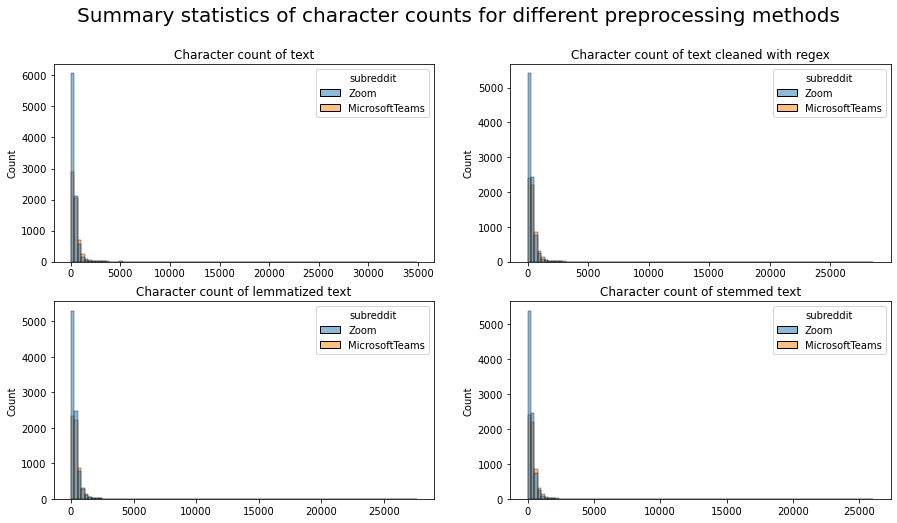

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,8))
fig.suptitle('Summary statistics of character counts for different preprocessing methods', size=20)

sns.histplot(data=zoom_team, x='char_count_text', hue='subreddit', bins=100, ax=ax[0,0])
ax[0,0].title.set_text('Character count of text')
ax[0,0].set_xlabel('')

sns.histplot(data=zoom_team, x='char_count_cleaned', hue='subreddit', bins=100, ax=ax[0,1])
ax[0,1].title.set_text('Character count of text cleaned with regex')
ax[0,1].set_xlabel('')

sns.histplot(data=zoom_team, x='char_count_lem', hue='subreddit', bins=100, ax=ax[1,0])
ax[1,0].title.set_text('Character count of lemmatized text')
ax[1,0].set_xlabel('')

sns.histplot(data=zoom_team, x='char_count_stem', hue='subreddit', bins=100, ax=ax[1,1])
ax[1,1].title.set_text('Character count of stemmed text')
ax[1,1].set_xlabel('');

Generating word clouds for a quick visual of the most common words

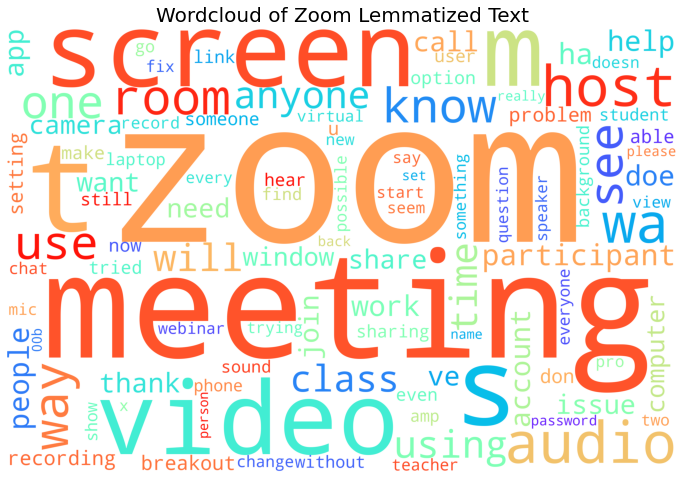

In [55]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(1, figsize=(12, 12))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.title('Wordcloud of Zoom Lemmatized Text', size=20)
    
# Generate word cloud

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='rainbow', collocations=False, 
                      stopwords = STOPWORDS, max_words=100).generate(zoom['lemmatized'].str.cat())
# Plot
plot_cloud(wordcloud)

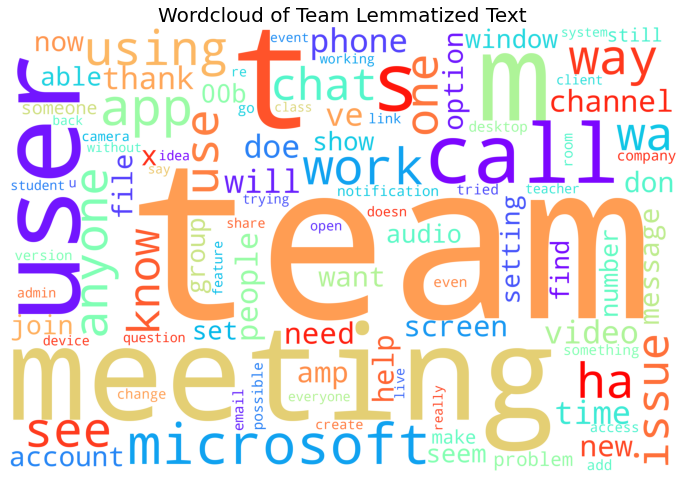

In [56]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(1, figsize=(12, 12))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.title('Wordcloud of Team Lemmatized Text', size=20)
    
# Generate word cloud

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='rainbow', collocations=False, 
                      stopwords = STOPWORDS, max_words=100).generate(team['lemmatized'].str.cat())
# Plot
plot_cloud(wordcloud)

Running CountVectorizer to see which are the top 100 words, when stop words are dropped.   

In [57]:
# Easy way to get most frequently used words: change max_features

count_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 100) 

# fit_transform the vectorizer
zoom_words = count_vect.fit_transform(zoom['lemmatized'])

# convert output to a Numpy array
zoom_words = zoom_words.toarray()

# Returns the number of rows and columns of X_counts
print(zoom_words.shape)

# get the words
zoom_words_list = count_vect.get_feature_names()
print(zoom_words_list)

(9021, 100)
['00', '00b', 'able', 'account', 'amp', 'app', 'application', 'audio', 'background', 'breakout', 'camera', 'change', 'chat', 'class', 'computer', 'device', 'different', 'doe', 'doesn', 'don', 'email', 'file', 'fine', 'fix', 'ha', 'having', 'hear', 'help', 'hi', 'host', 'id', 'idea', 'issue', 'join', 'just', 'know', 'laptop', 'like', 'link', 'live', 'make', 'meeting', 'mic', 'microphone', 'minute', 'mute', 'need', 'new', 'open', 'option', 'participant', 'password', 'pc', 'people', 'person', 'phone', 'possible', 'pro', 'problem', 'question', 'really', 'record', 'recording', 'room', 'say', 'school', 'screen', 'set', 'setting', 'share', 'sharing', 'sound', 'speaker', 'start', 'student', 'teacher', 'thanks', 'thing', 'time', 'tried', 'try', 'trying', 'use', 'used', 'user', 'using', 've', 'version', 'video', 'view', 'virtual', 'wa', 'want', 'way', 'webcam', 'webinar', 'window', 'work', 'working', 'zoom']


In [58]:
# fit_transform the vectorizer
team_words = count_vect.fit_transform(team['lemmatized'])

# convert output to a Numpy array
team_words = team_words.toarray()

# Returns the number of rows and columns of X_counts
print(team_words.shape)

# get the words
team_words_list = count_vect.get_feature_names()
print(team_words_list)

(6012, 100)
['00', '00b', 'able', 'access', 'account', 'add', 'admin', 'amp', 'app', 'audio', 'background', 'calendar', 'camera', 'change', 'channel', 'chat', 'class', 'client', 'company', 'computer', 'create', 'day', 'desktop', 'device', 'doe', 'doesn', 'don', 'email', 'event', 'external', 'feature', 'file', 'group', 'gt', 'guest', 'ha', 'having', 'hello', 'help', 'hi', 'idea', 'issue', 'join', 'just', 'know', 'laptop', 'like', 'link', 'live', 'looking', 'make', 'meeting', 'member', 'message', 'microsoft', 'need', 'new', 'notification', 'number', 'office', 'online', 'open', 'option', 'people', 'phone', 'possible', 'problem', 'question', 'really', 'room', 'say', 'screen', 'set', 'setting', 'share', 'skype', 'start', 'student', 'tab', 'teacher', 'team', 'thanks', 'thing', 'time', 'tried', 'try', 'trying', 'update', 'use', 'user', 'using', 've', 'version', 'video', 'wa', 'want', 'way', 'window', 'work', 'working']


In [59]:
# Let's add a few more stop words that were not captured
text.ENGLISH_STOP_WORDS

add_stop_words = ['00', '00b','did', 'doe', 'don', 'doesn', 'ha', 'hi', 've', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [60]:
# creating ngrams
ngram_vect = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = stop_words, 
                             max_features = 10000, 
                             ngram_range=(1, 3)
                            ) 

zoom_ngram = ngram_vect.fit_transform(zoom['lemmatized'])

print(zoom_ngram.shape)

zoom_ngram = zoom_ngram.toarray()

(9021, 10000)


In [61]:

zoom_ngram_matrix = pd.DataFrame(zoom_ngram, columns=ngram_vect.get_feature_names())

zoom_ngram_matrix.sum().sort_values(ascending=False).head(20)

zoom            12127
meeting          5632
screen           2569
video            2407
audio            2044
host             1949
room             1855
just             1652
way              1621
know             1540
class            1496
time             1495
use              1487
using            1453
join             1432
help             1411
participant      1387
zoom meeting     1339
like             1302
account          1283
dtype: int64

In [62]:
zoom_ngram_matrix.mean().sort_values(ascending=False).head(20)

zoom            1.344308
meeting         0.624321
screen          0.284780
video           0.266822
audio           0.226582
host            0.216051
room            0.205631
just            0.183128
way             0.179692
know            0.170713
class           0.165835
time            0.165724
use             0.164838
using           0.161069
join            0.158741
help            0.156413
participant     0.153752
zoom meeting    0.148431
like            0.144330
account         0.142224
dtype: float64

In [63]:
team_ngram = ngram_vect.fit_transform(team['lemmatized'])

print(team_ngram.shape)

team_ngram = team_ngram.toarray()

(6012, 10000)


In [64]:
team_ngram_matrix = pd.DataFrame(team_ngram, columns=ngram_vect.get_feature_names())

team_ngram_matrix.sum().sort_values(ascending=False).head(20)

team              11414
meeting            3449
user               2483
microsoft          2024
just               1609
work               1605
app                1558
way                1526
using              1446
use                1414
issue              1336
chat               1315
like               1281
microsoft team     1216
know               1203
phone              1200
time               1133
video              1103
channel            1032
people              985
dtype: int64

In [65]:
team_ngram_matrix.mean().sort_values(ascending=False).head(20)

team              1.898536
meeting           0.573686
user              0.413007
microsoft         0.336660
just              0.267631
work              0.266966
app               0.259148
way               0.253826
using             0.240519
use               0.235196
issue             0.222222
chat              0.218729
like              0.213074
microsoft team    0.202262
know              0.200100
phone             0.199601
time              0.188456
video             0.183466
channel           0.171657
people            0.163839
dtype: float64

In [66]:
# placing the ngrams into a matrix in order to plot a bar chart to see the the top words for each class and how they overlap. 
top20_zoom_ngram = pd.DataFrame(zoom_ngram_matrix.sum().sort_values(ascending=False).head(20)).transpose()
top20_team_ngram = pd.DataFrame(team_ngram_matrix.sum().sort_values(ascending=False).head(20)).transpose()

In [67]:
top40_ngram = pd.concat([top20_zoom_ngram, top20_team_ngram], axis=0).reset_index(drop=True)
top40_ngram

,zoom,meeting,screen,video,audio,host,room,just,way,know,class,time,use,using,join,help,participant,zoom meeting,like,account,team,user,microsoft,work,app,issue,chat,microsoft team,phone,channel,people
0,12127.0,5632,2569.0,2407,2044.0,1949.0,1855.0,1652,1621,1540,1496.0,1495,1487,1453,1432.0,1411.0,1387.0,1339.0,1302,1283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3449,NaN,1103,NaN,NaN,NaN,1609,1526,1203,NaN,1133,1414,1446,NaN,NaN,NaN,NaN,1281,NaN,11414.0,2483.0,2024.0,1605.0,1558.0,1336.0,1315.0,1216.0,1200.0,1032.0,985.0


In [68]:
top40_ngram['Target'] = [1, 0]
top40_ngram

,zoom,meeting,screen,video,audio,host,room,just,way,know,class,time,use,using,join,help,participant,zoom meeting,like,account,team,user,microsoft,work,app,issue,chat,microsoft team,phone,channel,people,Target
0,12127.0,5632,2569.0,2407,2044.0,1949.0,1855.0,1652,1621,1540,1496.0,1495,1487,1453,1432.0,1411.0,1387.0,1339.0,1302,1283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,3449,NaN,1103,NaN,NaN,NaN,1609,1526,1203,NaN,1133,1414,1446,NaN,NaN,NaN,NaN,1281,NaN,11414.0,2483.0,2024.0,1605.0,1558.0,1336.0,1315.0,1216.0,1200.0,1032.0,985.0,0


In [69]:
top40_ngram = top40_ngram.set_index('Target')

In [70]:
top40_ngram = top40_ngram.fillna(0)

In [71]:
top40_ngram.astype('int64').dtypes
len(top40_ngram.columns)

31

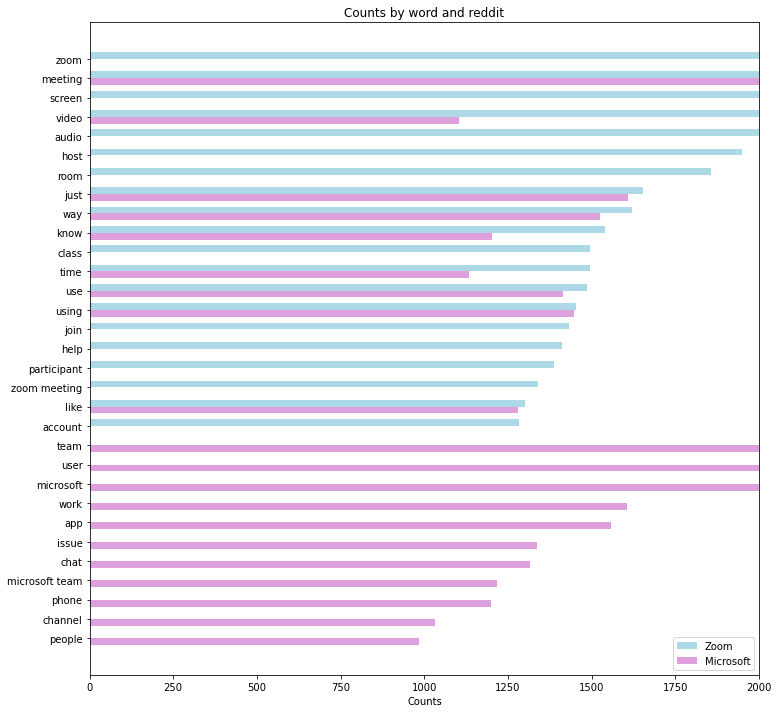

In [72]:
# Adapted from https://matplotlib.org/examples/api/barchart_demo.html
n_ngrams = 31 
ngram_zoom = list(top40_ngram.columns)
ngram_count_zoom = top40_ngram.loc[1]
ngram_team = list(top40_ngram.columns)
ngram_count_team = top40_ngram.loc[0]
width = 0.35       # the width of the bars
ind = np.arange(n_ngrams)

fig, ax = plt.subplots(figsize=(12, 12))
rects1 = ax.barh(ind, ngram_count_zoom, width, color='lightblue')
rects2 = ax.barh(ind+width,ngram_count_team, width, color='plum')

# add some text for labels, title and axes ticks
ax.set_xlabel('Counts')
ax.set_title('Counts by word and reddit')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(ngram_zoom) #rotation='vertical'

ax.set_xlim(0,2000)
ax.invert_yaxis()

ax.legend((rects1[0], rects2[0]), ('Zoom', 'Microsoft'))

plt.show();